# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


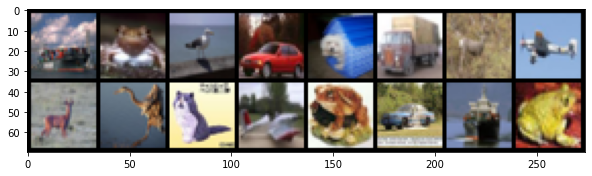

In [3]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

## Fully Connected Layer

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Flatten(),
            nn.Linear(32*32*3, 1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,32*32*3),
            nn.ReLU(),
            nn.Unflatten(1,(3,32,32)),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [5]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [6]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=128, bias=True)
  (8): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=128, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=3072, bias=True)
  (7): ReLU()
  (8): Unflatten(dim=1, unflattened_size=(3, 32, 32))
)



### Training

In [7]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_connected.pt")

[1,  2000] loss: 0.062
[2,  2000] loss: 0.031
[3,  2000] loss: 0.026
[4,  2000] loss: 0.024
[5,  2000] loss: 0.023
[6,  2000] loss: 0.023
[7,  2000] loss: 0.022
[8,  2000] loss: 0.021
[9,  2000] loss: 0.020
[10,  2000] loss: 0.020
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [8]:
# autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))
autoencoder.load_state_dict(torch.load("./autoencoder_connected.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


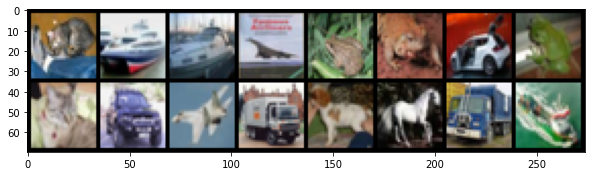

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image


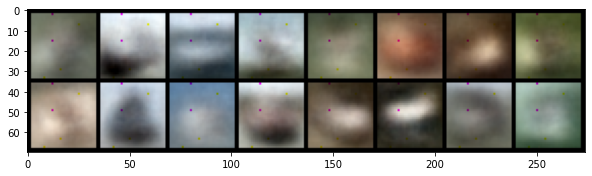

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

## Fully Convolution and Fully Connected Layer

In [10]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(12, 12, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(8*8*12,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
 
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256,8*8*12),
            nn.ReLU(),
            nn.Unflatten(1,(12,8,8)),
            nn.ConvTranspose2d(12,12,4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [11]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [12]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=768, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=128, bias=True)
  (8): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=128, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=768, bias=True)
  (3): ReLU()
  (4): Unflatten(dim=1, unflattened_size=(12, 8, 8))
  (5): ConvTranspose2d(12, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (6): ReLU()
  (7): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (8): Sigmoid()
)



### Training

In [13]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_mixed.pt")

[1,  2000] loss: 0.026
[2,  2000] loss: 0.016
[3,  2000] loss: 0.013
[4,  2000] loss: 0.012
[5,  2000] loss: 0.011
[6,  2000] loss: 0.011
[7,  2000] loss: 0.010
[8,  2000] loss: 0.010
[9,  2000] loss: 0.010
[10,  2000] loss: 0.010
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [14]:
# autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))
autoencoder.load_state_dict(torch.load("./autoencoder_mixed.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


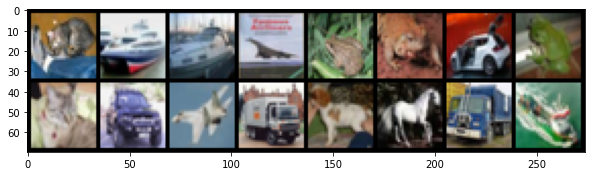

Reconstructed image


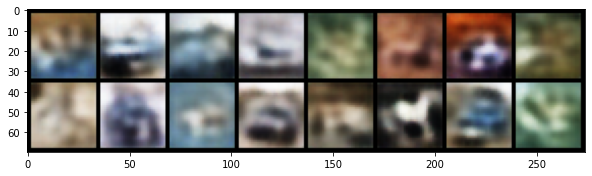

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

## Fully Convolution Layer

In [16]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 4, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 8, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(32, 16, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 4, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(4, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [17]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [18]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(4, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): ConvTranspose2d(8, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): ConvTranspose2d(4, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): Sigmoid()
)



### Training

In [19]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_convolution.pt")

[1,  2000] loss: 0.026
[2,  2000] loss: 0.015
[3,  2000] loss: 0.013
[4,  2000] loss: 0.011
[5,  2000] loss: 0.010
[6,  2000] loss: 0.010
[7,  2000] loss: 0.009
[8,  2000] loss: 0.009
[9,  2000] loss: 0.009
[10,  2000] loss: 0.008
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [20]:
# autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))
autoencoder.load_state_dict(torch.load("./autoencoder_convolution.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


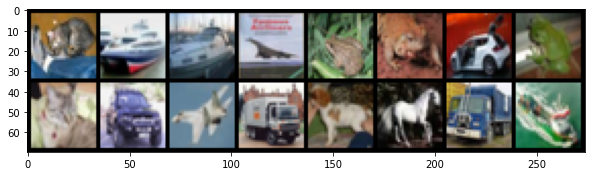

Reconstructed image


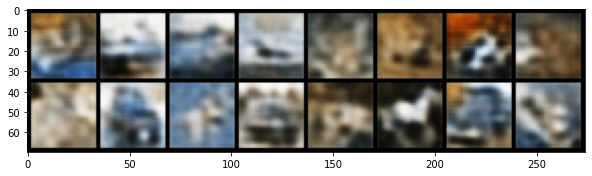

In [21]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

### Application of AutoEncoders -

- Image Compression
- Denosing Image
- Constructing missing part of an Image
- Image Generation
- Extracting important features from the data
- GrayScale image to colour image conversion 


### Types of AutoEncoders -
  - <b>Denoising Autoencoders</b> - This type of autoencoders add noise to the input data so that the autoencoder can avoide the copy of the input to output without learning the features.
  - <b>Sparse Autoencoders</b> - This type of autoencoders have more number of hidden nodes than the input nodes.
  - <b>Deep Autoencoders</b> - Deep autoencoders has 2 deep networks. One for encoding and one for decoding. This networks are identical and has 4-5 hidden layers in it. This autoencoders are compact and fast. This type of autoencoders can be used for image compression.
  - <b>Contractive Autoencoders</b> - Contractive Autoencoders are robust learned representation which is less sensitive to small changes. To conquer this problem a penalty term is introduced in loss functions.
  - <b>Undercomplete Autoencoders</b> - Undercomplete Autoencoders are used to capture most important features present in the data.
  - <b>Convolutional Autoencoders</b> - Convolutional Autoencoders are used to remove noise or reconstructed the missing part of an image.


#### 2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

- PCA is essentially a linear transformation but Auto-encoders are capable of modelling complex non linear functions.
- Autoencoders are black-box whereas PCA is mathematically explainable.
- Autoencoders are computationally expensive than PCA.
- Autoencoders are prone to overfitting due to high number of paramaters.
- If we have smaller dataset size than it is better to go with PCA and if dataset size is large Autoencoders are more useful.
- PCA is similar to single layer autoencoder with linear activation function.

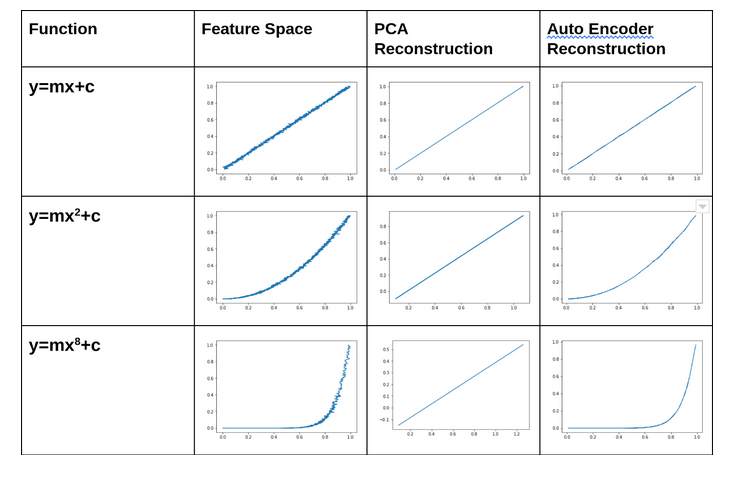

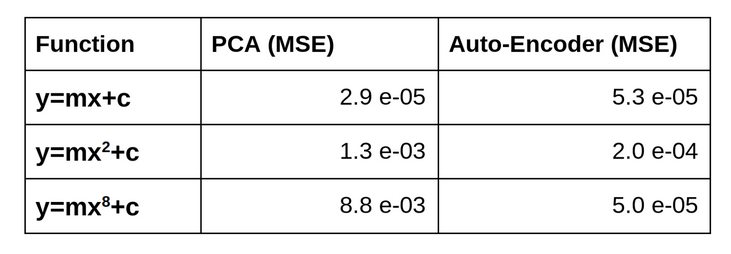